In [2]:
%matplotlib inline

# import libraries to read and plot statistical analyses of marine satellite data
import pandas as pd
import xarray as xr
import numpy as np
import warnings
import cmocean as cmo
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import gridspec, ticker
from dask.diagnostics import ProgressBar
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
# # Traga os dados para o seu computador local - utilize este comando para acessar a série temporal de dados
# # de temperatura de superficie do mar disponiveis no CMEMS.

# #1997 to 2019

# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "1997-01-01 12:00:00" --date-max "1997-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_1997_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "1998-01-01 12:00:00" --date-max "1998-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_1998_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "1999-01-01 12:00:00" --date-max "1999-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_1999_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2000-01-01 12:00:00" --date-max "2000-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2000_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2001-01-01 12:00:00" --date-max "2001-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2001_DAILY --user login --pwd
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2002-01-01 12:00:00" --date-max "2002-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2002_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2003-01-01 12:00:00" --date-max "2003-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2003_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2004-01-01 12:00:00" --date-max "2004-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2004_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2005-01-01 12:00:00" --date-max "2005-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2005_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2006-01-01 12:00:00" --date-max "2006-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2006_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2007-01-01 12:00:00" --date-max "2007-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2007_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2008-01-01 12:00:00" --date-max "2008-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2008_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2009-01-01 12:00:00" --date-max "2009-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2009_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2010-01-01 12:00:00" --date-max "2010-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2010_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2011-01-01 12:00:00" --date-max "2011-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2011_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2012-01-01 12:00:00" --date-max "2012-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2012_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2013-01-01 12:00:00" --date-max "2013-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2013_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2014-01-01 12:00:00" --date-max "2014-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2014_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2015-01-01 12:00:00" --date-max "2015-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2015_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2016-01-01 12:00:00" --date-max "2016-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2016_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2017-01-01 12:00:00" --date-max "2017-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2017_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2018-01-01 12:00:00" --date-max "2018-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2018_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2019-01-01 12:00:00" --date-max "2019-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2019_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2020-01-01 12:00:00" --date-max "2020-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2020_DAILY --user login --pwd senha


In [3]:
#### LOAD SEA SURFACE TEMPERATURE DATASET ##### 

source = xr.open_mfdataset('/home/br/git/CMEMS/ostia_data/SST*',concat_dim='time')
source = source.assign({'analysed_sst':source.analysed_sst-273}) # kelvin to celsius
source.close()

In [4]:
source

<xarray.Dataset>
Dimensions:         (time: 12601, lat: 401, lon: 400)
Coordinates:
  * time            (time) datetime64[ns] 1984-01-01T12:00:00 ... 2020-06-30T...
  * lat             (lat) float32 -40.03 -39.97 -39.92 ... -20.12 -20.08 -20.02
  * lon             (lon) float32 -59.97 -59.92 -59.88 ... -40.12 -40.08 -40.03
Data variables:
    analysis_error  (time, lat, lon) float32 dask.array<chunksize=(366, 401, 400), meta=np.ndarray>
    analysed_sst    (time, lat, lon) float32 dask.array<chunksize=(366, 401, 400), meta=np.ndarray>
    mask            (time, lat, lon) float32 dask.array<chunksize=(366, 401, 400), meta=np.ndarray>
Attributes: (12/52)
    Conventions:                CF-1.4, ACDD-1.3
    summary:                    A merged, multi-sensor L4 Foundation SST product
    references:                 Donlon, C.J., Martin, M., Stark, J.D., Robert...
    institution:                UKMO
    history:                    Created from sst.nc; obs_anal.nc; seaice.nc
    comment:                    WARNING Some applications are unable to prope...
    ...                         ...
    source:                     AMSR2-REMSS-L2P-v2.0, AMSRE-REMSS-L2P-v2.0, G...
    History:                    Translated to CF-1.0 Conventions by Netcdf-Ja...
    geospatial_lat_min:         -40.025001525878906
    geospatial_lat_max:         -20.024999618530273
    geospatial_lon_min:         -59.974998474121094
    geospatial_lon_max:         -40.025001525878906

In [5]:
# batimetria


dado = xr.open_dataset('/home/br/git/CMEMS/gebco-data/gebco_2020_n-20.0_s-40.0_w-60.0_e-40.0.nc')

bat = dado.interp({'lon':source.lon, 'lat':source.lat}).elevation

dado.close()
bat.close()

In [6]:
#source.var

In [8]:
#mask
mask_sst = source.analysed_sst.sel(lon=slice(-55.0, -40.0), lat=slice(-33.8, -21.0)).where((bat>-200)&(bat<-10 ))
mask_sst_error = source.analysis_error.sel(lon=slice(-55.0, -40.0), lat=slice(-33.8, -21.0)).where((bat>-200)&(bat<-10 ))

### mapa

/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


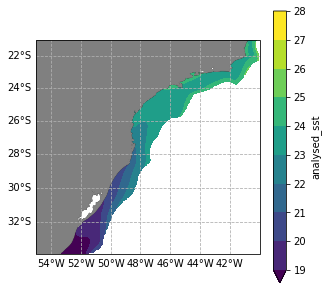

In [20]:
land = cfeature.NaturalEarthFeature(
    'physical','land','10m',edgecolor='face',facecolor='0.5'
)

proj = ccrs.Mercator()

kw = dict(transform=ccrs.PlateCarree())


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1,projection=proj)
mask_sst.mean('time').plot.contourf(ax=ax,vmin=19,vmax=27,levels=10,**kw)

#ax.plot([-34.9,-33],[-7,-7],color='red',**kw,zorder=1e3)
ax.coastlines()
ax.add_feature(land)
gl = ax.gridlines(draw_labels=True,linestyle='--')
gl.top_labels = False
gl.right_labels = False
ax.set_extent([
    -55, -40,
    -33.8, -21
],crs=ccrs.PlateCarree())

In [9]:
with ProgressBar():
    mean_sst = mask_sst.mean(['lon','lat']).compute()

[########################################] | 100% Completed | 31.7s


Text(0.5, 1.0, 'Sea Surface Temperature')

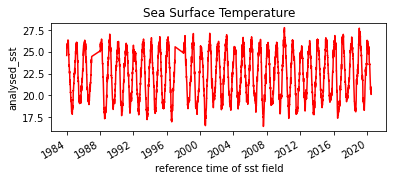

In [10]:
plt.figure(figsize=(6,2))
mean_sst.plot(x ="time" , color='red',linestyle='-')
plt.title('Sea Surface Temperature')

In [11]:
sst_serie = mean_sst.to_series()


In [12]:
sst_serie.to_csv('sst_time_series_from_netcdf.csv')

In [13]:
ls

cdm_data/                         read_esacci-chl.ipynb
chl_data/                         read_hovscorr_cdm+sst+chl.ipynb
cmems_get_data.ipynb              read_optics_plot+sst.ipynb
cmems-get-master                  read_sst_ostia.ipynb
codes/                            read_wind_cmems.ipynb
gebco-data/                       sos_data/
nemo/                             spm_data/
nemo_read.ipynb                   sst_time_series_from_netcdf.csv
oc-cci-chl/                       timeserie-wind-anomalies-seguro.ipynb
ostia_data/                       wind_data/
pft_data/                         zsd_data/
read_cmems_hovmollers_corr.ipynb


### medias groubby

In [14]:
season_sst = mask_sst.groupby("time.season").mean()
season_sst_error = mask_sst_error.groupby("time.season").mean()

/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


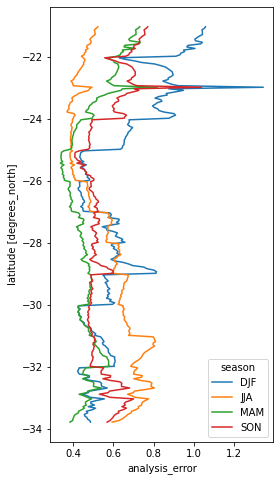

In [16]:
# #hue plot

plt.figure(figsize=(4,8))
#season_sst.mean("lon").plot.line(hue="season", y="lat", add_legend=True) 
season_sst_error.mean("lon").plot.line(hue="season", y="lat", add_legend=True)

# fig,axes = plt.subplots(ncols=2, sharey=True, figsize=(4,8))

# im = season_sst.mean("lon").plot.line(ax=[0],hue="season", y="lat", add_legend=True) 

# axes[0].set_xlabel('Celsius')
# axes[0].set_title('sst')

# im = season_sst_error.mean("lon").plot.line(ax=[1],hue="season", y="lat", add_legend=True)

# axes[1].set_xlabel('%')
# axes[1].set_title('error_sst')

In [17]:
## estações ####

## classificando os dados conforme estações do ano ###

winter_sst = season_sst.sel(season='JJA')
summer_sst = season_sst.sel(season='DJF')
spring_sst = season_sst.sel(season='SON')
autumn_sst = season_sst.sel(season='MAM')

lon = season_sst.lon
lat = season_sst.lat

/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1586: UserWarning: The following kwargs were not used by contour: 'shading'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/cartopy

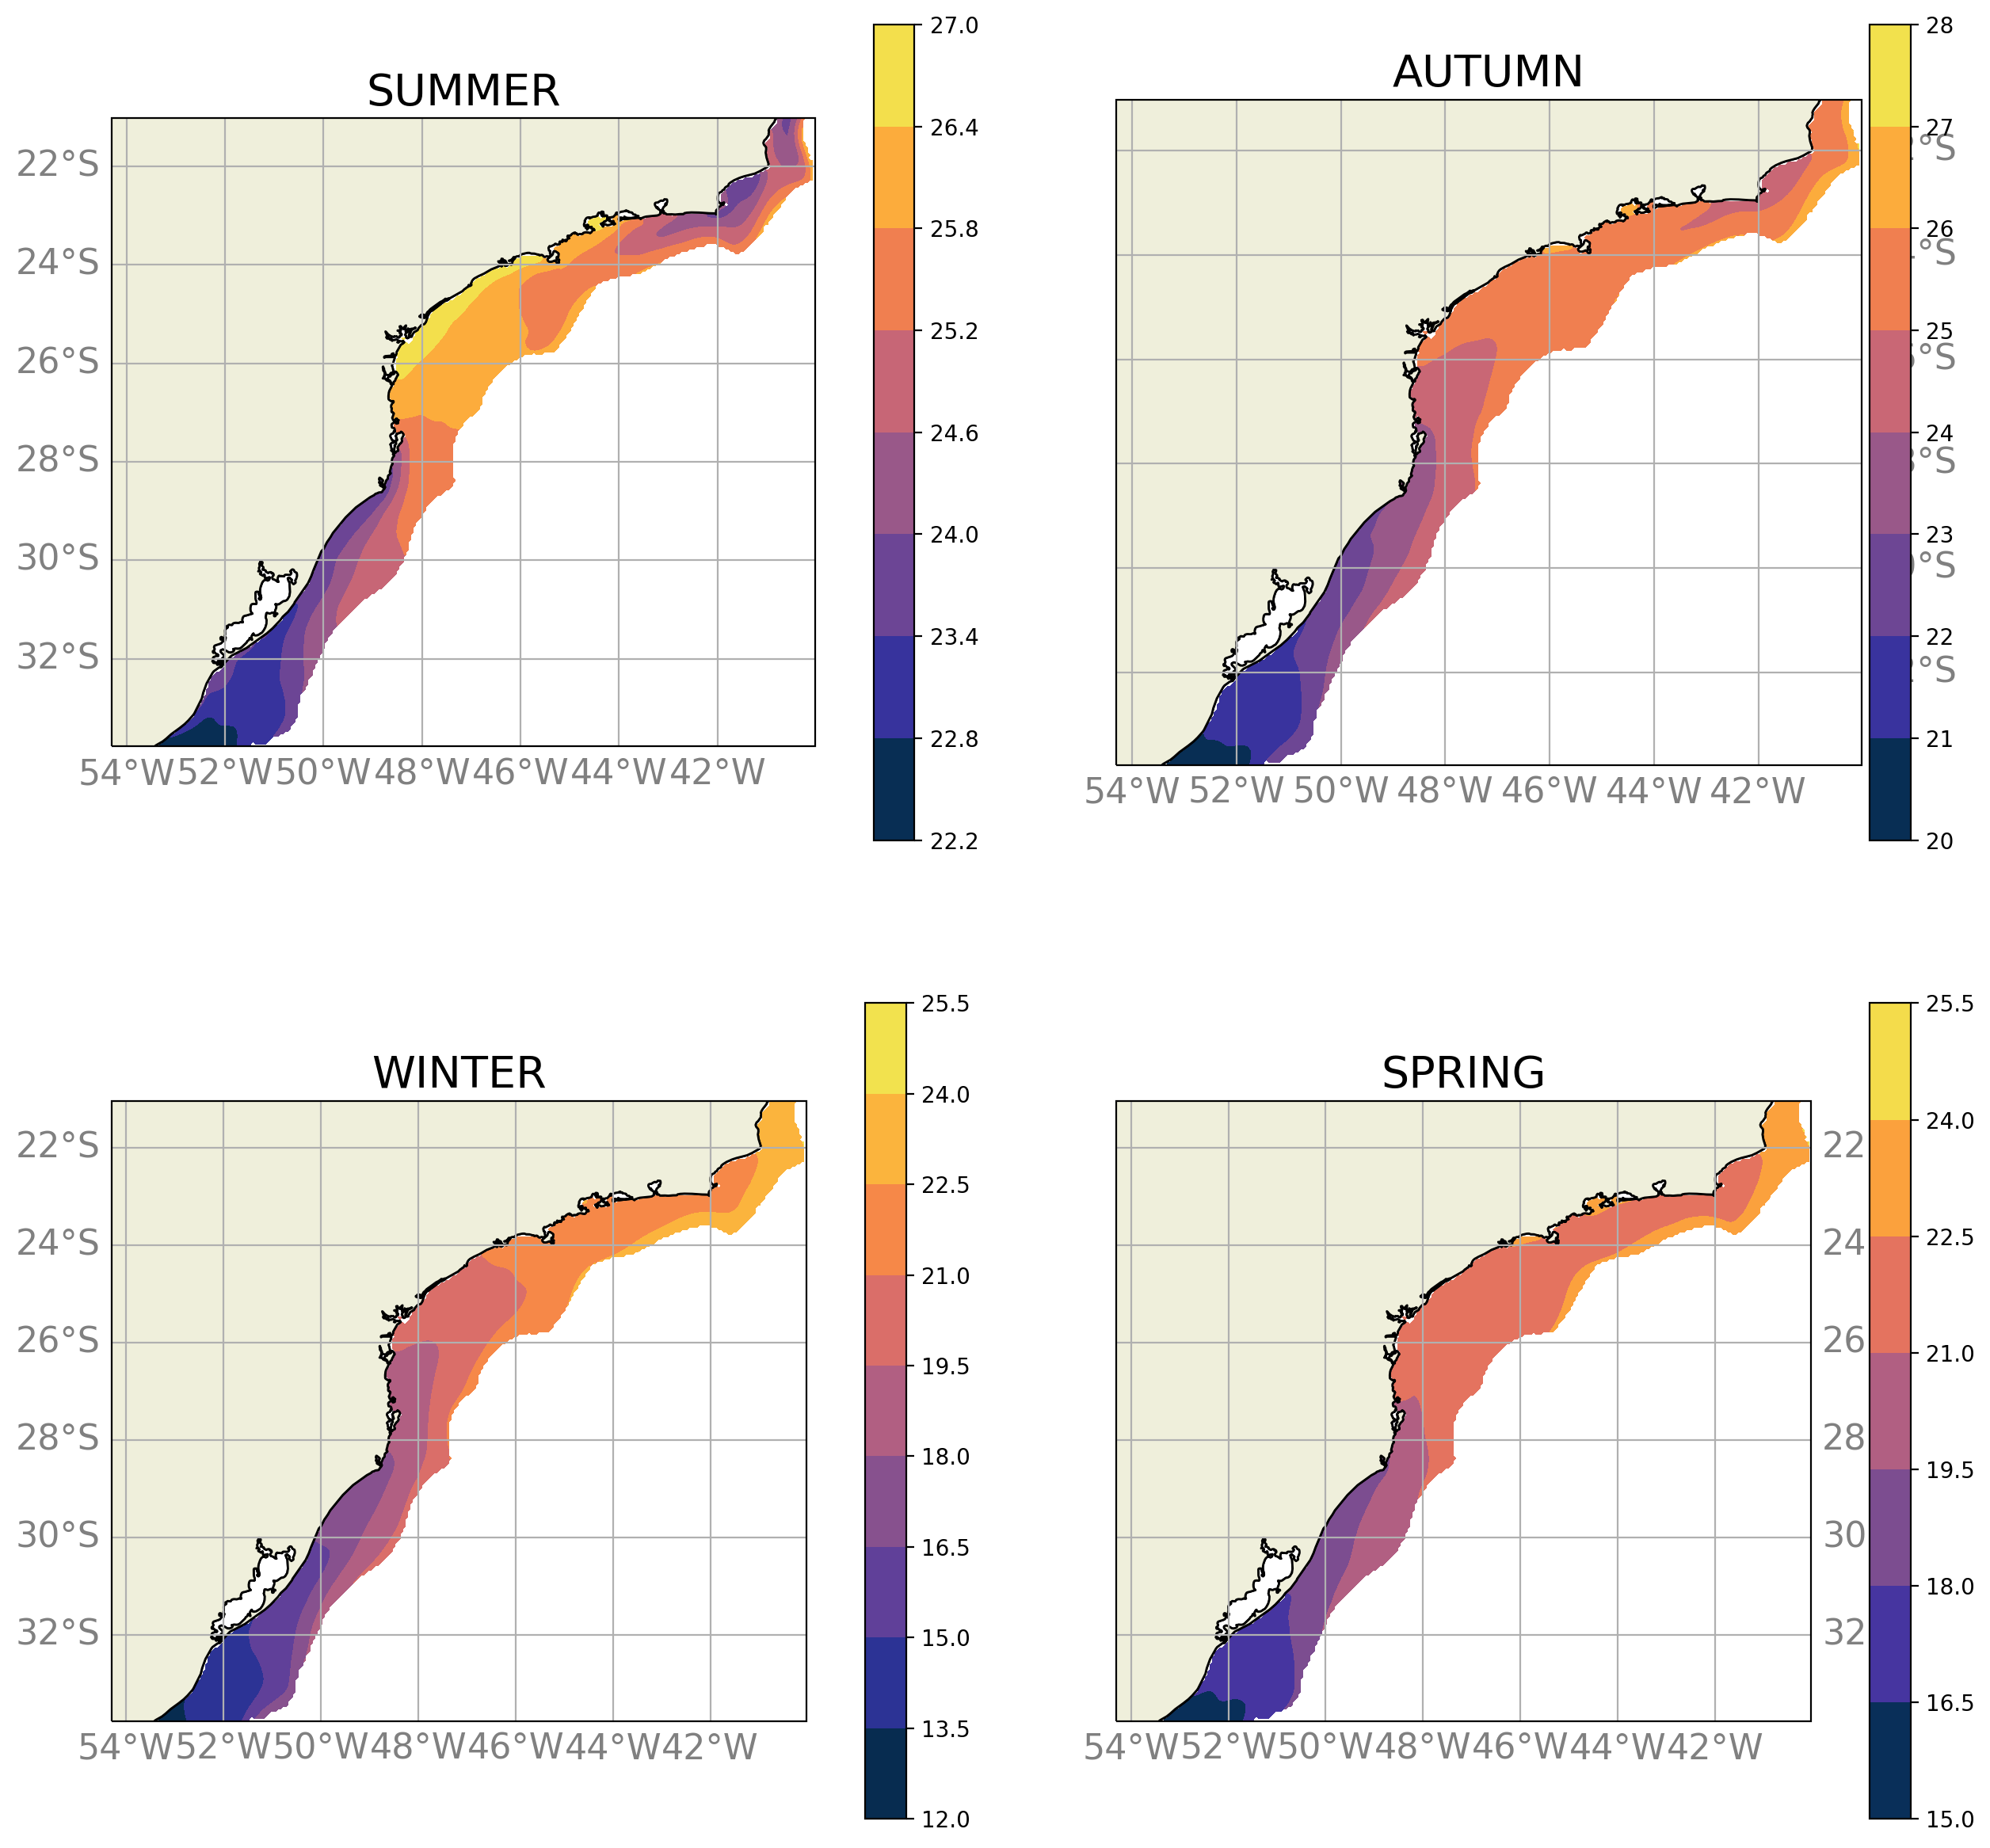

In [18]:
### CARTOPY SUBPLOT ###

land_resolution = '10m'
land_poly = cfeature.NaturalEarthFeature('physical', 'land', land_resolution,
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])

#%%capture

fig1 = plt.figure(figsize=(15, 15), dpi=200)

gs  = gridspec.GridSpec(2, 2)

#plot SUMMER

m = plt.subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=0.0))
f1 = plt.contourf(lon, lat, summer_sst, shading='flat', cmap=cmo.cm.thermal)
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g1 = m.gridlines(draw_labels = True)
g1.xlabels_top= False
g1.ylabels_right = False
g1.xlabel_style = {'size': 16, 'color': 'gray'}
g1.ylabel_style = {'size': 16, 'color': 'gray'}
cbar = plt.colorbar(f1, orientation="vertical", fraction=0.09, pad=0.07) #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('SUMMER', fontsize=20)

#plot AUTUMN
m = plt.subplot(gs[0,1], projection=ccrs.PlateCarree(central_longitude=0.0))
f2 = plt.contourf(lon, lat, autumn_sst, shading='flat', cmap=cmo.cm.thermal)
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g1 = m.gridlines(draw_labels = True)
g1.xlabels_top = False
g1.ylabels_left = False
g1.xlabel_style = {'size': 16, 'color': 'gray'}
g1.ylabel_style = {'size': 16, 'color': 'gray'}
cbar = plt.colorbar(f2, orientation="vertical", fraction=0.1, pad=0.01) #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1'], fontsize=20) 
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('AUTUMN', fontsize=20)

#plot WINTER
m = plt.subplot(gs[1,0], projection=ccrs.PlateCarree(central_longitude=0.0))
f3 = plt.contourf(lon, lat, winter_sst, shading='flat', cmap=cmo.cm.thermal)
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g1 = m.gridlines(draw_labels = True)
g1.xlabels_top = False
g1.ylabels_right = False
g1.xlabel_style = {'size': 16, 'color': 'gray'}
g1.ylabel_style = {'size': 16, 'color': 'gray'}
cbar = plt.colorbar(f3, orientation="vertical", fraction=0.1, pad=0.07) #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
#cbar.set_label('celsius, fontsize=20)
plt.title('WINTER', fontsize=20)

#plot SPRING

m = plt.subplot(gs[1,1], projection=ccrs.PlateCarree(central_longitude=0.0))
f4 = plt.contourf(lon, lat, (spring_sst), shading='flat', cmap=cmo.cm.thermal)
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g1 = m.gridlines(draw_labels = True)
g1.xlabels_top = False
g1.ylabels_left = False
g1.xlabel_style = {'size': 16, 'color': 'gray'}
g1.ylabel_style = {'size': 16, 'color': 'gray'}
cbar = plt.colorbar(f4, orientation="vertical", fraction=0.1, pad=0.07) #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2),]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
#cbar.set_label('celsius, fontsize=20)
plt.title('SPRING', fontsize=20)

# COLOBAR

#cbar = fig1.colorbar(ax=[f1,f2,f3,f4], orientation="vertical", aspect=50, fraction=0.02, pad=0.06)
#cbar.set_label(r'sea surface temperature')

plt.show()

In [29]:
# mon_sst = mask_sst.sel(time=slice('1985','2019')).groupby('time.month').mean('time')

# with ProgressBar():
#     mean_m_sst = mon_sst.mean(['lon','lat']).compute() 

[########################################] | 100% Completed | 18.9s


Text(0.5, 1.0, 'Sea Surface Temperature')

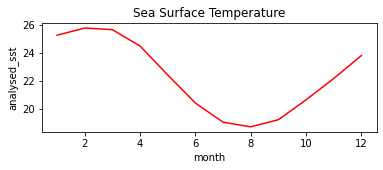

In [32]:
# plt.figure(figsize=(6,2))
# mean_m_sst.plot(x ="month" , color='red',linestyle='-')
# plt.title('Sea Surface Temperature')

In [19]:
year_sst = mask_sst.sel(time=slice('1985','2019')).groupby('time.year').mean('time')

with ProgressBar():
    year_y_sst = year_sst.mean(['lon','lat']).compute() 

[#########################               ] | 63% Completed | 21.4s

/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 27.6s


In [ ]:
plt.figure(figsize=(6,2))
year_y_sst.plot(x ="year" , color='red',linestyle='-')
plt.title('Sea Surface Temperature')

In [22]:
pd_sst = ymean_sst.to_series()
print(pd_sst)

year
1985    22.281431
1986    22.599066
1988    21.735994
1989    22.326969
1990    22.209463
1991    22.286753
1992    21.962761
1993    22.156464
1994    22.162315
1995    22.271570
1996    22.169975
1998    22.195812
1999    21.869101
2000    21.800392
2001    22.564312
2002    22.515316
2003    22.369543
2004    22.176527
2005    22.649960
2006    22.443989
2007    22.012943
2008    22.120043
2009    22.443111
2010    22.461914
2011    21.965961
2012    22.234102
2013    21.986689
2014    22.489981
2015    22.646484
2016    22.008718
2017    22.653471
2018    22.590515
2019    22.981497
Name: analysed_sst, dtype: float32


In [17]:

#variância: média dos desvios quadráticos
print(np.var(pd_sst))

0.07862363755702972


In [19]:
#desvio padrão: raiz quadrada da variância
print(np.std(pd_sst))

0.28039905428886414


In [20]:
pd_sst.describe()

count    33.000000
mean     22.283127
std       0.284747
min      21.735994
25%      22.120043
50%      22.271570
75%      22.489981
max      22.981497
Name: analysed_sst, dtype: float64